# PCA

## Customer Satisfaction Analysis

A survey in order to evaluate 20 different healthcare structures. 2000 customers have evaluated, with a 1-10 scale, each of six features of the service:

1. Courtesy
2. Clarity
3. Competence
4. Condition (of the structure)
5. Promptness (of the service)
6. Opening times

In [1]:
import numpy as np
import pandas as pd

In [2]:
df2 = pd.read_csv("csat.csv")
print(df2.head())

df2.describe()


   Courtesy  Clarity  Competence  Condition  Promptness  Opening_times
0         7        5           9          8           6              7
1         5        6           8          4           4              6
2         5        5           8          7           7              7
3         6        6           9          7           6              7
4         7        5          10          4           3              6


,Courtesy,Clarity,Competence,Condition,Promptness,Opening_times
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,4.800000,4.600000,7.600000,6.150000,5.000000,6.300000
std,1.105013,0.994723,1.535544,1.814416,1.169795,0.732695
min,3.000000,3.000000,5.000000,3.000000,3.000000,5.000000
25%,4.000000,4.000000,6.750000,4.750000,4.000000,6.000000
50%,5.000000,5.000000,8.000000,6.500000,5.000000,6.000000
75%,5.000000,5.000000,8.250000,7.250000,6.000000,7.000000
max,7.000000,6.000000,10.000000,9.000000,7.000000,7.000000


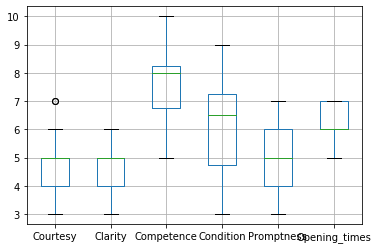

In [3]:
%matplotlib inline
df2.boxplot()


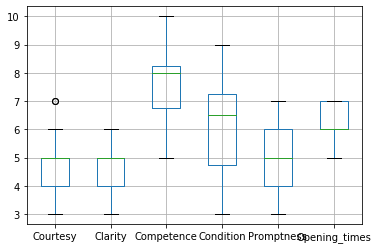

In [4]:
#dataset scaling and visualizing
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler(copy=False) #or alternatively use MinMaxScaler
scaler2.fit(df2.astype(float)) # 
scaler2.transform(df2.astype(float))
df2.boxplot()

In [5]:
df2_scaled=pd.DataFrame(scaler2.transform(df2.astype(float))) 
df2_scaled.columns=df2.columns
df2_scaled.head()

,Courtesy,Clarity,Competence,Condition,Promptness,Opening_times
0,2.042649,0.412568,0.935414,1.046100,0.877058,0.980196
1,0.185695,1.443990,0.267261,-1.215737,-0.877058,-0.420084
2,0.185695,0.412568,0.267261,0.480640,1.754116,0.980196
3,1.114172,1.443990,0.935414,0.480640,0.877058,0.980196
4,2.042649,0.412568,1.603567,-1.215737,-1.754116,-0.420084


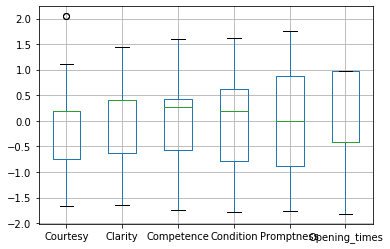

In [6]:
df2_scaled.boxplot()

In [8]:
df2.apply(lambda s: df2.corrwith(s))

,Courtesy,Clarity,Competence,Condition,Promptness,Opening_times
Courtesy,1.000000,0.545861,0.694808,-0.115503,0.000000,0.143014
Clarity,0.545861,1.000000,0.544426,-0.081652,0.045231,0.101100
Competence,0.694808,0.544426,1.000000,0.003778,-0.058601,-0.121628
Condition,-0.115503,-0.081652,0.003778,1.000000,0.719114,0.439450
Promptness,0.000000,0.045231,-0.058601,0.719114,1.000000,0.798282
Opening_times,0.143014,0.101100,-0.121628,0.439450,0.798282,1.000000


In [9]:
#PCA fit
from sklearn.decomposition import PCA
# we can choose the number of components e.g. 10, the percentage of the total variance or set it to None (that means it automatically chooses the number of components)
pca2 = PCA()
pca2.fit(df2_scaled) #The fit learns some quantities from the data, most importantly the "components" and "explained variance"

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
#let's use the pca to transform the dataset
df2_pca = pd.DataFrame(pca2.transform(df2_scaled))

In [11]:
#Let's analyse what happened
#VISUALIZE The amount of variance explained by each of the 10 selected principal components.
pd.DataFrame(pca2.explained_variance_).transpose()

,0,1,2,3,4,5
0,2.450138,2.313038,0.712002,0.507948,0.216216,0.116447


In [12]:
#VISUALIZE The percentage of variance explained by each of the selected components.
explained_var=pd.DataFrame(pca2.explained_variance_ratio_).transpose()
explained_var

,0,1,2,3,4,5
0,0.387939,0.366231,0.112734,0.080425,0.034234,0.018437


In [13]:
#VISUALIZE The cumulative percentage of explained variance
cum_explained_var=np.cumsum(pca2.explained_variance_ratio_)
pd.DataFrame(cum_explained_var).transpose()

,0,1,2,3,4,5
0,0.387939,0.75417,0.866903,0.947328,0.981563,1.0


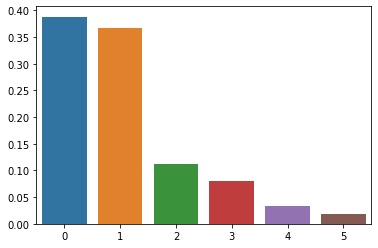

In [14]:
%matplotlib inline
import seaborn as sns
ax = sns.barplot( data=explained_var)

In [15]:
pd.DataFrame(pca2.components_,index=['PC1','PC2','PC3','PC4','PC5','PC6'],columns=df2.columns)


,Courtesy,Clarity,Competence,Condition,Promptness,Opening_times
PC1,0.108588,0.082955,0.166297,-0.527831,-0.616793,-0.542802
PC2,-0.586905,-0.538902,-0.562070,-0.051455,-0.135631,-0.167814
PC3,-0.123933,-0.244882,0.467594,0.651152,-0.018854,-0.530731
PC4,0.537682,-0.790670,0.155511,-0.143601,-0.023690,0.200931
PC5,0.545638,0.131997,-0.617261,0.443239,-0.274763,-0.178578
PC6,0.203886,-0.012432,-0.180513,-0.278686,0.724403,-0.568564


### 1st component:

The variables

   - Condition
   - Promptness
   - Opening-times

show a high correlation with the first component. This component can be summarized as an index of the **structure’s performances**

### 2nd component:

The variables
   - Courtesy
   - Clarity
   - Competence

show a high correlation with the second component. 
This component can be summarized as an index of the **personnel’s performance**

**Notice that the Principal Components have negative values in the variables that they explain.**

In [16]:
df2_pca.columns=['PC1','PC2','PC3','PC4','PC5','PC6']
df2_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.213592,-2.284217,0.227626,0.943510,0.639256,0.028990
1,1.595084,-0.785365,-0.803792,-0.889361,-0.095906,-0.086024
2,-1.768841,-0.908673,-0.239397,-0.098422,-0.453160,0.563923
3,-0.930384,-2.266028,-0.278082,-0.290028,0.018155,-0.015550
4,2.474352,-1.951528,-0.139969,1.153190,0.197307,-0.571159
5,0.983820,-0.337580,-0.430245,1.220114,-0.102566,0.764267
6,3.007233,-0.806971,0.268340,-1.046038,-0.017288,-0.045829
7,1.211056,-0.258626,-0.183017,-0.155048,0.018583,-0.230788
8,-0.224336,1.040537,0.592068,-0.125843,0.048535,0.033514
9,-1.227878,-0.789717,-0.222861,-0.077645,-0.212176,-0.071421


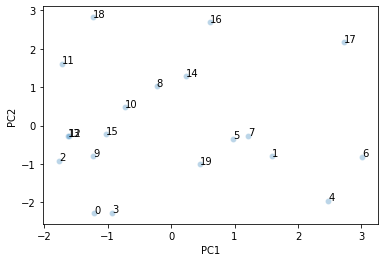

In [17]:
p1=sns.scatterplot(x="PC1", y="PC2",
              alpha=.3, 
              data=df2_pca);

# add annotations one by one with a loop
for line in range(0,df2_pca.shape[0]):
     p1.text(df2_pca.PC1[line], df2_pca.PC2[line], line, horizontalalignment='left', size='medium', color='black')


We conclude that 
 - centers 18,11 has a GOOD infrastructure but a BAD service
 - the group near 1,4,6 has BAD infrastructure but GOOD service quality 
 - the group 0,3,2,9 has GOOD infrastructure and service
 - center 17 has BAD infrastructure and service!

## Breast cancer wisconsin (diagnostic) dataset

In [18]:
#upload a toy datasets from scikit-learn
#sklearn comes with a few small standard datasets that do not require to download any file from some external website
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer() #The breast cancer dataset is a classic and very easy binary classification dataset.

#create the dataframe
dataset_df = pd.DataFrame(dataset.data)
columns = dataset.feature_names
dataset_df.columns = columns

print(dataset["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


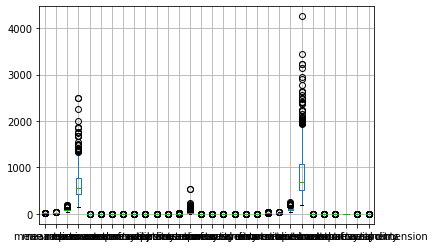

In [19]:
#dataset visualization tools
%matplotlib inline
dataset_df.boxplot()
dataset_df.head()

## mtcars

In [45]:
# Import CSV mtcars
cars = pd.read_csv('mtcars.csv',index_col = 0)

The car types are a mix that includes sedans (Datsun, Ford, Honda,…), luxury sedans (Mercedes, Cadellac,..), muscle cars (Javelin, Challenger, Camaro…) and high-end sports cars (Porsche, Lotus, Maserati, Ferrari…)

- 	mpg 	Miles/US Gallon 	mpg is the determinant of fuel efficiency
- 	cyl 	Number of cylinders 	Data includes vehicles with 4,6,8 cylinder engines.
- 	disp 	Displacement (cu.in.) 	Displacement measures overall volume in the engine as a factor of cylinder circumfrance, depth and total number of cylinders. This metric gives a good proxy for the total amount of power the engine can generate.
- 	hp 	Gross horsepower 	Gross horsepower measures the theoretical output of an engine’s power output
- 	drat 	Rear axle ratio 	The rear axle gear ratio indicates the number of turns of the drive shaft for every one rotation of the wheel axle. 
- 	qsec 	1/4 mile time 	A performance measure, primarily of acceleration. Fastest time to travel 1/4 mile from standstill (in seconds).
- 	vs 	V/S 	Binary variable signaling the engine cylinder configuration a V-shape (vs=0) or Straight Line (vs=1). V==0 and S==1. 
- 	am 	Transmission Type 	A binary variable signaling whether vehicle has automatic (am=0) or manual (am=1) transmission configuration.
- 	gear 	Number of forward gears 	Number of gears in the transmission.
- 	carb 	Number of carburetors 	The number of carburetor barrels.

In [52]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Iris database

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()


In [12]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
#create the dataframe
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names